In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import zipfile

In [34]:
import wget
URL = "https://storage.googleapis.com/ztm_tf_course/nlp_getting_started.zip"
response = wget.download(URL, "nlp_getting_started.zip")

In [35]:
def unzip_data(filename):
  """
  Unzips filename into the current working directory.

  Args:
    filename (str): a filepath to a target zip folder to be unzipped.
  """
  zip_ref = zipfile.ZipFile(filename, "r")
  zip_ref.extractall()
  zip_ref.close()
# Unzip data
unzip_data("nlp_getting_started.zip")



BadZipFile: File is not a zip file

In [ ]:
train_df = pd.read_csv("train.csv")

In [ ]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7613 entries, 0 to 7612
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        7613 non-null   int64 
 1   keyword   7552 non-null   object
 2   location  5080 non-null   object
 3   text      7613 non-null   object
 4   target    7613 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 297.5+ KB


In [ ]:
from sklearn.model_selection import train_test_split

train_sentences, val_sentences, train_labels, val_labels, = train_test_split(train_df["text"].to_numpy(), train_df["target"].to_numpy(), test_size = 0.1, random_state=42)

In [ ]:
len(train_sentences), len(train_labels), len(val_sentences), len(val_labels)



(6851, 6851, 762, 762)

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline

model = Pipeline([
                    ("tfidf", TfidfVectorizer()), # convert words to numbers using tfidf
                    ("Bayes_Classifier", MultinomialNB()) # model the text
])



In [ ]:
model

Pipeline(steps=[('tfidf', TfidfVectorizer()),
                ('Bayes_Classifier', MultinomialNB())])

In [37]:
model.fit(train_sentences, train_labels)

Pipeline(steps=[('tfidf', TfidfVectorizer()),
                ('Bayes_Classifier', MultinomialNB())])

In [39]:
val_pred = model.predict(val_sentences)

In [40]:
val_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0,
       0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0,
       1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0,

In [63]:
test = input()

pred = model.predict([test])

In [ ]:
text

In [ ]:
pred

In [65]:
if pred[0]==0:
    print("The given statement is not related to a disaster.")
else: 
    print("The given statement is related to a disaster.")
    

The given statement is related to a disaster.


              precision    recall  f1-score   support

           0       0.74      0.92      0.82       426
           1       0.86      0.60      0.70       336

    accuracy                           0.78       762
   macro avg       0.80      0.76      0.76       762
weighted avg       0.79      0.78      0.77       762



[Text(0, 0.5, 'No Disaster'), Text(0, 1.5, 'Disaster')]

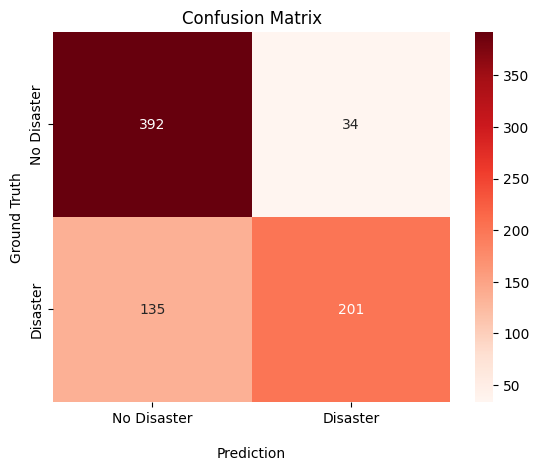

In [66]:
from sklearn.metrics import classification_report as cr 
from sklearn.metrics import confusion_matrix as cm


print(cr(val_labels,val_pred))


confusion_matrix = cm(val_labels,val_pred)
ax = sns.heatmap(confusion_matrix, annot=True,fmt='d',cmap='Reds')
ax.set_title("Confusion Matrix");
ax.set_xlabel('\nPrediction')
ax.set_ylabel('Ground Truth');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['No Disaster','Disaster'])
ax.yaxis.set_ticklabels(['No Disaster','Disaster'])
